In [148]:
#import the sensor file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sensor = pd.read_csv('sensor_readings.csv')

leak_locations_and_rate = pd.read_csv('leak_locations_and_rate.csv')
leak_locations_and_rate.head()

,EventID,NumberSourcesLeaking,LeakPointId,Latitude,Longitude,EmissionCategory,UTCStart,UTCEnd,Duration,LeakRate,BFT,tStart,tEnd
0,40,2,4T-31,40.595830,-105.139824,Fugitive,2023-04-18_00:00:35.000000,2023-04-18_00:15:35.000000,900,36.636270,ReferenceMeteredEvent,1681776035,1681776935
1,40,2,5S-26,40.595924,-105.139390,Fugitive,2023-04-18_00:00:35.000000,2023-04-18_00:15:35.000000,900,64.621765,ReferenceMeteredEvent,1681776035,1681776935
2,41,2,4W-27,40.595936,-105.140270,Fugitive,2023-04-18_00:15:35.000000,2023-04-18_01:00:35.000000,2700,55.385376,ReferenceMeteredEvent,1681776935,1681779635
3,41,2,4S-43,40.595642,-105.140350,Fugitive,2023-04-18_00:15:35.000000,2023-04-18_01:00:35.000000,2700,24.345577,ReferenceMeteredEvent,1681776935,1681779635
4,42,2,4T-31,40.595830,-105.139824,Fugitive,2023-04-18_00:15:35.000000,2023-04-18_00:45:35.000000,1800,36.636270,ReferenceMeteredEvent,1681776935,1681778735


In [149]:
sensor.head()
sensor = sensor.drop(columns=['Unnamed: 0'])


In [150]:
#what time format is the sensor data in? POSIX time 
#convert posix time to datetime in sensor time
sensor['time'] = pd.to_datetime(sensor['time'], unit='s')

#remove unnamed column

#83413 data points
sensor.head()

,time,111111_ 40.595561_-105.14055_3,111111_ 40.596108_-105.140583_4,111111_40.595556_-105.140069_2,111111_40.596114_-105.140075_1,222222_ 40.596108_-105.140583_4,222222_40.595556_-105.140069_2,222222_40.595561_-105.14055_3,222222_40.596114_-105.140075_1,333333_40.595658_-105.139869_2,...,444444_40.595881_-105.139686_1,444444_40.595947_-105.139833_4,555555_40.595542_-105.139211_2,555555_40.595547_-105.139714_3,555555_40.596089_-105.139144_1,555555_40.596097_-105.139678_4,666666_40.595542_-105.139211_2,666666_40.595547_-105.139714_3,666666_40.596089_-105.139144_1,666666_40.596097_-105.139678_4
0,2023-04-18 00:00:02,1030.0,1049.0,1166.0,964.0,1023.0,1090.5,1039.5,1153.0,1082.0,...,1120.0,735.0,1088.0,991.5,931.0,1040.0,1040.0,1111.0,1080.0,1089.0
1,2023-04-18 00:00:03,1033.0,1051.0,1163.0,974.0,993.0,1095.0,1044.0,1152.0,1085.0,...,1104.5,765.0,1090.0,984.0,928.5,1043.0,1052.0,1105.5,1075.0,1095.0
2,2023-04-18 00:00:04,1022.0,1051.0,1160.0,975.5,974.0,1081.0,1049.0,1133.0,1088.0,...,1089.0,762.0,1095.0,993.0,926.0,1039.0,1033.0,1100.0,1021.0,1093.0
3,2023-04-18 00:00:05,1034.0,1050.0,1165.0,977.0,988.0,1084.0,1019.0,1128.0,1091.0,...,1082.0,762.0,1100.0,999.0,929.0,1047.5,1014.0,1107.0,1059.5,1110.0
4,2023-04-18 00:00:06,1037.5,1049.0,1155.0,977.0,971.0,1084.0,1027.0,1144.0,1090.5,...,1070.0,763.0,1100.0,1004.5,944.0,1056.0,1019.0,1098.0,1098.0,1107.5


In [165]:
#using the column names, creating a visualization of the location of each sensor
sensor_locations = sensor.columns[1:]
#go though each sensor location and create a list of the xy coordinates
sensor_xy = []
for i in sensor_locations:
    #only want the xy coordinates
    sensor_xy.append((i.split('_')[1:3]))

sensor_xy.sort()
sensor_xy

[[' 40.595561', '-105.14055'],
 [' 40.596108', '-105.140583'],
 [' 40.596108', '-105.140583'],
 ['40.595542', '-105.139211'],
 ['40.595542', '-105.139211'],
 ['40.595547', '-105.139714'],
 ['40.595547', '-105.139714'],
 ['40.595556', '-105.140069'],
 ['40.595556', '-105.140069'],
 ['40.595561', '-105.14055'],
 ['40.595658', '-105.139869'],
 ['40.595658', '-105.139869'],
 ['40.595725', '-105.140008'],
 ['40.595725', '-105.140008'],
 ['40.595881', '-105.139686'],
 ['40.595881', '-105.139686'],
 ['40.595947', '-105.139833'],
 ['40.595947', '-105.139833'],
 ['40.596089', '-105.139144'],
 ['40.596089', '-105.139144'],
 ['40.596097', '-105.139678'],
 ['40.596097', '-105.139678'],
 ['40.596114', '-105.140075'],
 ['40.596114', '-105.140075']]

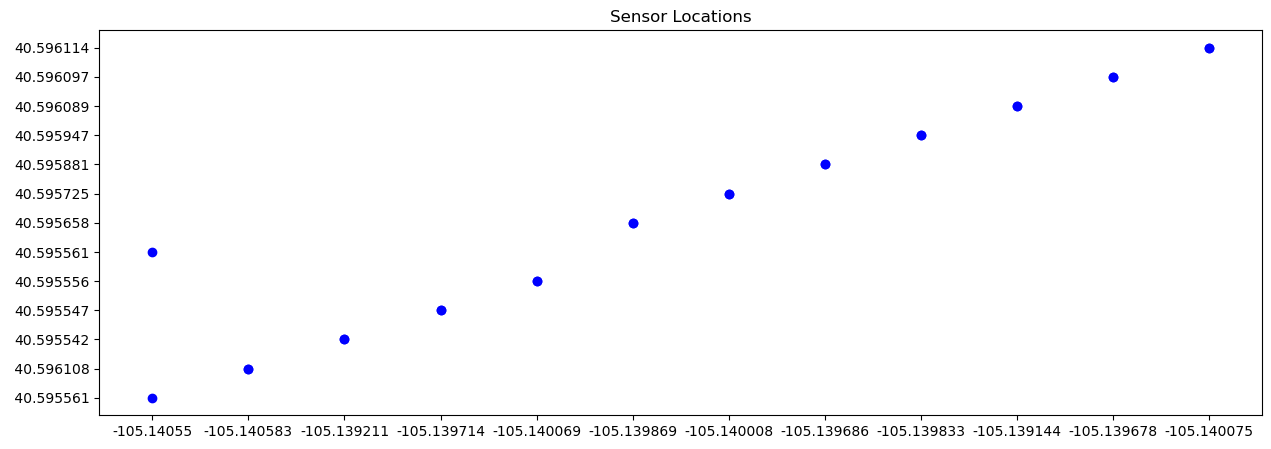

In [166]:
# sensor_xy.sort()
#plot sensor locations using xy coordinates
plt.figure(figsize=(15,5))
for x in sensor_xy:
    plt.scatter(x[1], x[0], color='blue')

plt.title('Sensor Locations')
plt.show()

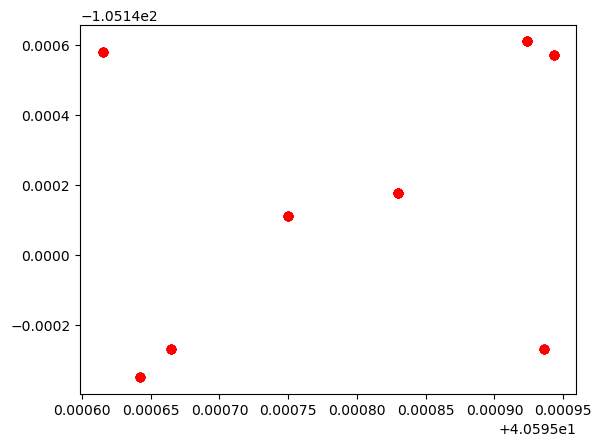

In [210]:
#use the leak locations and rate to create a visualization of the leak locations
leak_locations_and_rate.head()
#get data of column 3 and 5 of leak_locations_and_rate

leakCoordinates=leak_locations_and_rate.iloc[:,[3,4]].copy()
#based on leak coordinate graph the xy coordinates

leakCoordinates.dropna(inplace=True)
leakCoordinates.values

for x in leakCoordinates.values:
    plt.scatter(x=x[0], y=x[1], color='red')

array([[  40.59583 , -105.139824],
       [  40.595924, -105.13939 ],
       [  40.595936, -105.14027 ],
       [  40.595642, -105.14035 ],
       [  40.59583 , -105.139824],
       [  40.595924, -105.13939 ],
       [  40.59583 , -105.139824],
       [  40.595924, -105.13939 ],
       [  40.595936, -105.14027 ],
       [  40.595642, -105.14035 ],
       [  40.59583 , -105.139824],
       [  40.595924, -105.13939 ],
       [  40.595936, -105.14027 ],
       [  40.595642, -105.14035 ],
       [  40.59583 , -105.139824],
       [  40.595924, -105.13939 ],
       [  40.595665, -105.14027 ],
       [  40.59575 , -105.13989 ],
       [  40.595943, -105.13943 ],
       [  40.595615, -105.13942 ],
       [  40.59575 , -105.13989 ],
       [  40.595615, -105.13942 ],
       [  40.595943, -105.13943 ],
       [  40.595665, -105.14027 ],
       [  40.595665, -105.14027 ],
       [  40.59575 , -105.13989 ],
       [  40.595615, -105.13942 ],
       [  40.595943, -105.13943 ],
       [  40.595665,